In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import pickle as pkl

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
%run utils.ipynb
%run targets.ipynb

In [4]:
file = 'data/ETHBTC_1m_1519496760000_1549568220000.csv'

In [5]:
# Get Data
df = pd.read_csv(file)
df.shape
df.head(10)

(500000, 12)

OPEN_TIME      OPEN      HIGH       LOW     CLOSE  VOLUME  \
0  1519496760000  0.085541  0.085570  0.085407  0.085473  27.714   
1  1519496820000  0.085473  0.085570  0.085448  0.085449  20.128   
2  1519496880000  0.085448  0.085569  0.085400  0.085538  45.510   
3  1519496940000  0.085538  0.085546  0.085402  0.085540  22.231   
4  1519497000000  0.085539  0.085552  0.085464  0.085464  15.243   
5  1519497060000  0.085466  0.085555  0.085464  0.085545  31.895   
6  1519497120000  0.085545  0.085545  0.085464  0.085539  13.325   
7  1519497180000  0.085539  0.085555  0.085414  0.085517  28.202   
8  1519497240000  0.085460  0.085545  0.085419  0.085534  15.302   
9  1519497300000  0.085440  0.085545  0.085440  0.085533  13.730   

      CLOSE_TIME  QUOTE_VOL  NUM_TRADES  TAKE_BASE_VOL  TAKE_QUOTE_VOL  EXTRA  
0  1519496819999   2.370345         192         15.308        1.309733      0  
1  1519496879999   1.720609         122          6.579        0.562654      0  
2  1519496939999   3.890176         209         19.426        1.660960      0  
3  1519496999999   1.900513         105         14.320        1.224483      0  
4  1519497059999   1.303412         117          8.373        0.716219      0  
5  1519497119999   2.727413         131         19.237        1.645547      0  
6  1519497179999   1.139346          78          7.311        0.625352      0  
7  1519497239999   2.411093         195         14.409        1.232346      0  
8  1519497299999   1.307959         134          7.216        0.617035      0  
9  1519497359999   1.173580         105          6.186        0.529001      0

In [6]:
data = df.loc[:, ['OPEN_TIME', 'OPEN', 'HIGH', 'LOW', 'CLOSE']]
data.shape
data[:5]

(500000, 5)

OPEN_TIME      OPEN      HIGH       LOW     CLOSE
0  1519496760000  0.085541  0.085570  0.085407  0.085473
1  1519496820000  0.085473  0.085570  0.085448  0.085449
2  1519496880000  0.085448  0.085569  0.085400  0.085538
3  1519496940000  0.085538  0.085546  0.085402  0.085540
4  1519497000000  0.085539  0.085552  0.085464  0.085464

In [7]:
data_validation(data)

In [8]:
# Get Target
%run targets.ipynb
target = get_target_1(file)
target.shape
target.head()

(499999, 2)

OPEN_TIME  TARGET
0  1519496760000     1.0
1  1519496820000     0.0
2  1519496880000     0.0
3  1519496940000     1.0
4  1519497000000     0.0

In [9]:
data = pd.merge(data, target, on='OPEN_TIME')
data.shape
data.head()

(499999, 6)

OPEN_TIME      OPEN      HIGH       LOW     CLOSE  TARGET
0  1519496760000  0.085541  0.085570  0.085407  0.085473     1.0
1  1519496820000  0.085473  0.085570  0.085448  0.085449     0.0
2  1519496880000  0.085448  0.085569  0.085400  0.085538     0.0
3  1519496940000  0.085538  0.085546  0.085402  0.085540     1.0
4  1519497000000  0.085539  0.085552  0.085464  0.085464     0.0

In [10]:
data_validation(data)

In [11]:
data.describe()

OPEN_TIME           OPEN           HIGH            LOW  \
count  4.999990e+05  499999.000000  499999.000000  499999.000000   
mean   1.534528e+12       0.051343       0.051377       0.051307   
std    8.686686e+09       0.019869       0.019885       0.019853   
min    1.519497e+12       0.024659       0.024666       0.024630   
25%    1.526997e+12       0.032582       0.032597       0.032566   
50%    1.534530e+12       0.045459       0.045491       0.045427   
75%    1.542043e+12       0.071582       0.071626       0.071534   
max    1.549568e+12       0.089300       0.089800       0.089269   

               CLOSE         TARGET  
count  499999.000000  499999.000000  
mean        0.051342       0.479845  
std         0.019869       0.499594  
min         0.024661       0.000000  
25%         0.032583       0.000000  
50%         0.045460       0.000000  
75%         0.071582       1.000000  
max         0.089330       1.000000

In [12]:
frac_data_use = 0.2

tr_frac = 0.6
cv_frac = 0.2
tt_frac = 0.2

TR_data = data[:int(len(data)*tr_frac)]
CV_data = data[int(len(data)*tr_frac):int(len(data)*(tr_frac+cv_frac))]
TT_data = data[int(len(data)*(tr_frac+cv_frac)):]

TR_data.shape
CV_data.shape
TT_data.shape

(299999, 6)

(100000, 6)

(100000, 6)

In [57]:
win=300
TR_X, TR_y = get_multiple_ts_dataset(TR_data.values, tr_win=win, tt_win=0, point_target=True)
CV_X, CV_y = get_multiple_ts_dataset(CV_data.values, tr_win=win, tt_win=0, point_target=True)
TT_X, TT_y = get_multiple_ts_dataset(TT_data.values, tr_win=win, tt_win=0, point_target=True)

In [58]:
TR_X.shape
TR_y.shape

(299700, 1201)

(299700,)

In [59]:
TR_X_ = TR_X[:, 1:].T
CV_X_ = CV_X[:, 1:].T
TT_X_ = TT_X[:, 1:].T

TR_X_ = (TR_X_ - TR_X_.min(axis=0)) / (TR_X_.max(axis=0) - TR_X_.min(axis=0))
CV_X_ = (CV_X_ - CV_X_.min(axis=0)) / (CV_X_.max(axis=0) - CV_X_.min(axis=0))
TT_X_ = (TT_X_ - TT_X_.min(axis=0)) / (TT_X_.max(axis=0) - TT_X_.min(axis=0))

TR_X_[np.isnan(TR_X_)] = 0
CV_X_[np.isnan(CV_X_)] = 0
TT_X_[np.isnan(TT_X_)] = 0

TR_X[:, 1:] = TR_X_.T
CV_X[:, 1:] = CV_X_.T
TT_X[:, 1:] = TT_X_.T

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


In [60]:
from sklearn.linear_model import LogisticRegression

params = {
            'dual'              : False,
            'fit_intercept'     : True,
            'intercept_scaling' : 1,
            'max_iter'          : 100,
            'multi_class'       : 'ovr',
            'class_weight'      : None,
            'random_state'      : 0,
            'verbose'           : 1,
            'warm_start'        : False,
            'n_jobs'            : -1,
            'penalty'           : 'l2',
            'solver'            : 'sag'
        }

params['C'] = 30
params['tol'] = 0.00001

model = LogisticRegression(**params)
model = model.fit(TR_X[:, 1:], TR_y)

TR_y_pred = model.predict_proba(TR_X[:, 1:])[:, 1]
CV_y_pred = model.predict_proba(CV_X[:, 1:])[:, 1]
TT_y_pred = model.predict_proba(TT_X[:, 1:])[:, 1]

TR_metrics = eval_class_metrics(TR_y, TR_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])
CV_metrics = eval_class_metrics(CV_y, CV_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])
TT_metrics = eval_class_metrics(TT_y, TT_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])

res = pd.DataFrame({x:[] for x in ['auc', 'f1', 'acc', 'log_loss']})
res = res.append(pd.Series(TR_metrics, name='TR'))
res = res.append(pd.Series(CV_metrics, name='CV'))
res = res.append(pd.Series(TT_metrics, name='TT'))

print(res)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 72 epochs took 274 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  4.6min finished


         acc       auc        f1   log_loss
TR  0.532709  0.523056  0.368956  16.139746
CV  0.511489  0.500597  0.346303  16.872673
TT  0.509554  0.500706  0.307139  16.939512


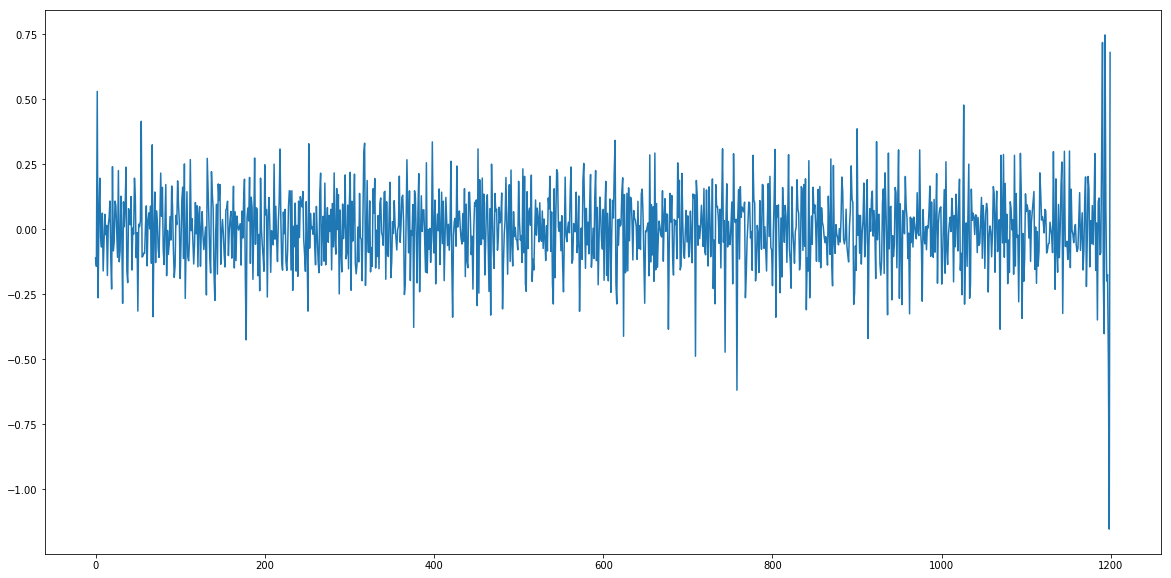

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(model.coef_[0,:])

In [62]:
TR_y_pred = model.predict(TR_X[:, 1:])
TR_y_pred[:5]

TR_metrics = eval_class_metrics(TR_y, TR_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])
TR_metrics

array([1., 0., 0., 1., 0.])

{'acc': 0.5327093760427094,
 'auc': 0.5230561667064321,
 'f1': 0.36895583722722136,
 'log_loss': 16.13974564297377}

In [63]:
(TR_y_pred > 0.5).sum()

78149

In [64]:
CV_y_pred = model.predict(CV_X[:, 1:])
CV_y_pred[:5]

CV_metrics = eval_class_metrics(CV_y, CV_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])
CV_metrics

array([0., 0., 0., 0., 0.])

{'acc': 0.5114893531659662,
 'auc': 0.50059685548144,
 'f1': 0.3463030319298858,
 'log_loss': 16.872673303443484}

In [65]:
TT_y_pred = model.predict(TT_X[:, 1:])
TT_y_pred[:5]

TT_metrics = eval_class_metrics(TT_y, TT_y_pred, metrics=['auc', 'f1', 'acc', 'log_loss'])
TT_metrics

array([0., 0., 0., 0., 0.])

{'acc': 0.5095535651598279,
 'auc': 0.5007057797146495,
 'f1': 0.3071386062856009,
 'log_loss': 16.93951183975721}

In [66]:
data_tag = '__'.join([str(x)+'_'+str(y) for x, y in {
    'intv':'1m', 
    'cols':'OHCL',
    'rollNorm': True,
    'win':win
}.iteritems()])

proc_tag = '__'.join([str(x)+'_'+str(y) for x, y in {
    'model': 'LRL2',
    'n_iter': 89,
    'accuracy':'{:.4f}'.format((CV_metrics['acc']+TT_metrics['acc'])/2)
}.iteritems()])

import time
time_tag = time.strftime('%y%m%d_%H%M%S')

big_tag = time_tag+'_|_'+data_tag+'_|_'+proc_tag

f = open('models/'+time_tag+'.pkl', 'wb')
pkl.dump(model, f, -1)
f.close()

%notebook -e models/{big_tag}.ipynb